In [ ]:
                                                      #   Association Rules   #
#Prepare rules for the all the data sets
#1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
#2) Change the minimum length in apriori algorithm
#3) Visulize the obtained rules using different plots

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import networkx as nx

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Load the 'my_movies' dataset
my_movies_df = pd.read_csv('/content/my_movies.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Convert the dataset into a list of transactions
transactions = []
for i, row in my_movies_df.iterrows():
    transactions.append([col for col in my_movies_df.columns if row[col] == 1])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Use TransactionEncoder to convert the transactions into a binary format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
binary_df = pd.DataFrame(te_ary, columns=te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Task 1: Generate rules with different support and confidence values
def generate_rules(data, min_support, min_confidence):
    frequent_itemsets = apriori(data, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
    return rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Task 2: Change the minimum length in Apriori algorithm
def generate_rules_with_length(data, min_length):
    frequent_itemsets = apriori(data, min_support=0.1, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
    filtered_rules = rules[rules['antecedents'].apply(lambda x: len(x) >= min_length)]
    return filtered_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Task 3: Visualize obtained rules using different plots
def visualize_rules(rules):
    # Plotting network graph
    G = nx.DiGraph()
    for row in rules.iterrows():
        G.add_edge(str(row[1]['antecedents']), str(row[1]['consequents']), weight=row[1]['support'])

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=7000, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrows=True)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Task 1: Try different values of support and confidence
support_values = [0.1, 0.2]
confidence_values = [0.5, 0.6]

for support in support_values:
    for confidence in confidence_values:
        rules = generate_rules(binary_df, support, confidence)
        print(f"\nRules for Support={support}, Confidence={confidence}:\n", rules)


Rules for Support=0.1, Confidence=0.5:
                 antecedents                                      consequents  \
0              (Braveheart)                                      (Gladiator)   
1              (Braveheart)                                        (Patriot)   
2              (Green Mile)                                      (Gladiator)   
3                    (LOTR)                                      (Gladiator)   
4                 (Patriot)                                      (Gladiator)   
..                      ...                                              ...   
211  (Harry Potter1, LOTR2)                 (Green Mile, Sixth Sense, LOTR1)   
212            (Green Mile)       (LOTR1, LOTR2, Harry Potter1, Sixth Sense)   
213                 (LOTR1)  (Green Mile, LOTR2, Harry Potter1, Sixth Sense)   
214         (Harry Potter1)          (Green Mile, LOTR2, Sixth Sense, LOTR1)   
215                 (LOTR2)  (Green Mile, Harry Potter1, Sixth Sense, LOTR1)   

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Task 2: Change the minimum length in Apriori algorithm
min_length = 2
filtered_rules = generate_rules_with_length(binary_df, min_length)
print(f"\nRules with minimum length {min_length}:\n", filtered_rules)


Rules with minimum length 2:
                       antecedents                               consequents  \
31          (Patriot, Braveheart)                               (Gladiator)   
32        (Gladiator, Braveheart)                                 (Patriot)   
34             (Green Mile, LOTR)                               (Gladiator)   
35        (Green Mile, Gladiator)                                    (LOTR)   
36              (LOTR, Gladiator)                              (Green Mile)   
..                            ...                                       ...   
207  (Harry Potter1, Sixth Sense)                (Green Mile, LOTR2, LOTR1)   
208          (LOTR2, Sixth Sense)        (Green Mile, Harry Potter1, LOTR1)   
209        (LOTR1, Harry Potter1)          (Green Mile, LOTR2, Sixth Sense)   
210                (LOTR1, LOTR2)  (Green Mile, Harry Potter1, Sixth Sense)   
211        (Harry Potter1, LOTR2)          (Green Mile, Sixth Sense, LOTR1)   

     antecedent supp

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


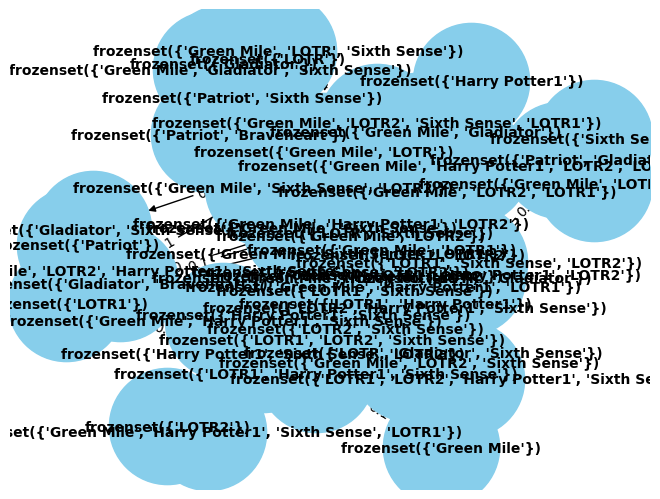

In [ ]:
# Task 3: Visualize obtained rules using different plots
visualize_rules(filtered_rules)